In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('home_data.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


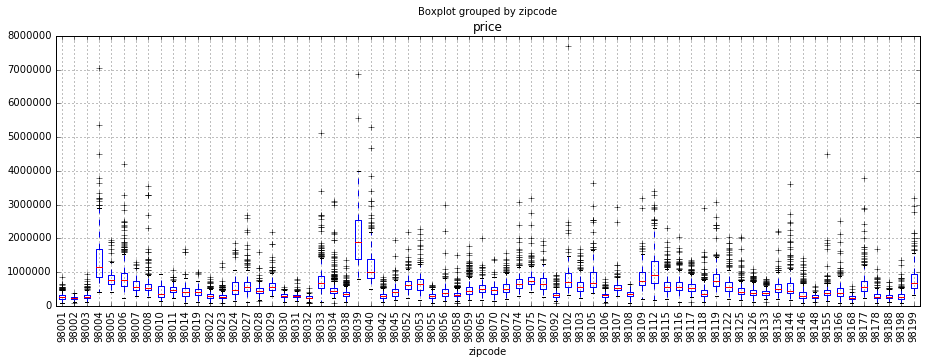

In [3]:
 #visualizing prize by different locations
    
df.boxplot(column='price', by='zipcode', figsize=(15, 5), rot=90)

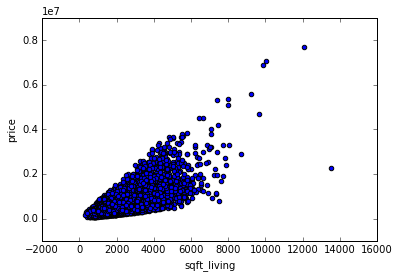

In [4]:
df.plot.scatter( 'sqft_living', 'price')

In [5]:
df[df['zipcode']==98039][['price']].describe()

,price
count,5.000000e+01
mean,2.160607e+06
std,1.166477e+06
min,7.875000e+05
25%,1.401000e+06
50%,1.892500e+06
75%,2.556250e+06
max,6.885000e+06


In [6]:
len(df[(df['sqft_living']>2000) & (df['sqft_living']<4000)])/float(len(df))

0.4215518437977143

In [7]:
features1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
features2 = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors
           ]

In [8]:
x1 = df[features1]
x2 = df[features2]
y = df['price']

In [9]:
X_train1, X_test1, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=0)

In [10]:
rgr1 = LinearRegression()
rgr2 = LinearRegression()

In [11]:
rgr1.fit(X_train1, y_train)
rgr2.fit(X_train2, y_train)
rgr1.score(X_test1, y_test), rgr2.score(X_test2, y_test)

(0.499359281311759, 0.6949310001418052)

In [13]:
from math import sqrt

y_hat1 = rgr1.predict(X_test1)
y_hat2 = rgr2.predict(X_test2)
rmse1 = sqrt(mean_squared_error(y_test, y_hat1))
rmse2 = sqrt(mean_squared_error(y_test, y_hat2))
rmse1, rmse2

(244004.7744310419, 190473.37570967388)